In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.loc[(data['age']<50)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
22,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1


In [6]:
data.loc[(data['age']>50)&(data['sex']==0), ['age','sex','cp','trestbps','chol','restecg','target']]

,age,sex,cp,trestbps,chol,restecg,target
4,62,0,0,138,294,1,0
5,58,0,0,100,248,0,1
10,71,0,0,112,149,1,1
16,51,0,2,140,308,0,1
21,67,0,0,106,223,1,1
...,...,...,...,...,...,...,...
986,55,0,0,180,327,2,0
989,71,0,1,160,302,1,1
996,56,0,0,134,409,0,0
1004,51,0,2,140,308,0,1


In [7]:
data.iloc[:,[0,1,-1]]

,age,sex,target
0,52,1,0
1,53,1,0
2,70,1,0
3,61,1,0
4,62,0,0
...,...,...,...
1020,59,1,1
1021,60,1,0
1022,47,1,0
1023,50,0,1


In [8]:
data.sort_values('age', ascending=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


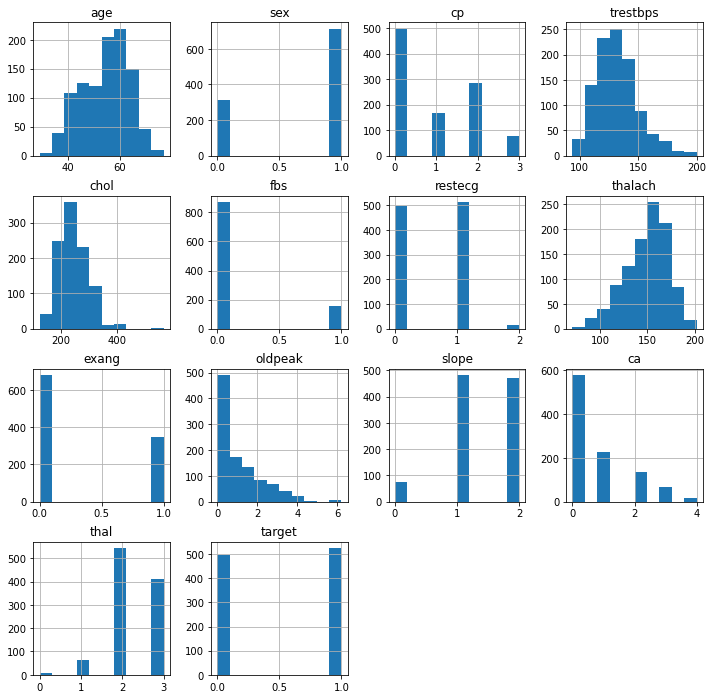

In [9]:
data.hist(figsize=(12,12))
plt.show()

1    526
0    499
Name: target, dtype: int64


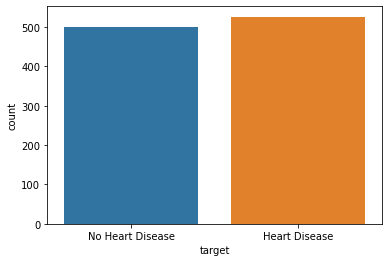

In [10]:
# Below block of code describes the people who have and haven't heart disease

result = data['target'].value_counts()
print(result)

sns.countplot(x='target',data=data)
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
plt.show()

1    526
0    499
Name: target, dtype: int64


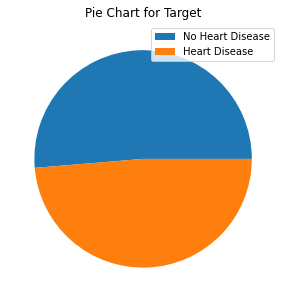

In [11]:
target_val=data['target'].value_counts()
print(target_val)

plt.figure(figsize=(10,5))
plt.pie(target_val)
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
plt.title("Pie Chart for Target")
plt.show()

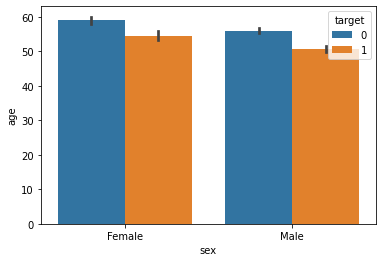

In [12]:
# Below block of code describes the bar chart containing age and sex as y and x axis and distributed with target to show who have heart disease

sns.barplot(x='sex',y='age',hue='target', data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

1    713
0    312
Name: sex, dtype: int64


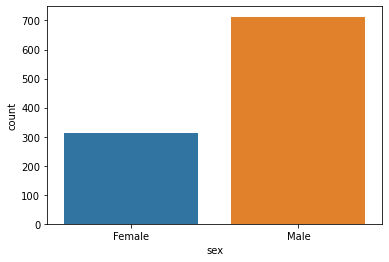

In [13]:
# Below block of code describes the count of male and female in the dataset

result = data['sex'].value_counts()
print(result)

sns.countplot(x='sex',data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()


1    713
0    312
Name: sex, dtype: int64


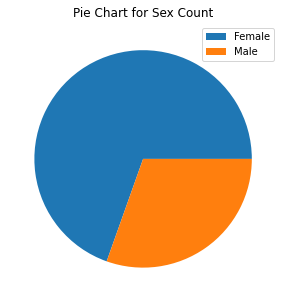

In [14]:
# Visualization with pie chart

sex_val = data['sex'].value_counts()
print(sex_val)

plt.figure(figsize=(10,5))
plt.pie(sex_val)
plt.legend(labels=['Female', 'Male'])
plt.title("Pie Chart for Sex Count")
plt.show()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64


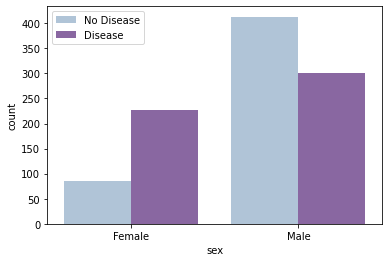

In [15]:
# Below block of code describes the male and female who have and haven't heart disease

result = data.groupby('sex')['target'].value_counts()
print(result)

sns.countplot(x='sex',hue='target',data=data, palette='BuPu')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No Disease','Disease'])
plt.show()


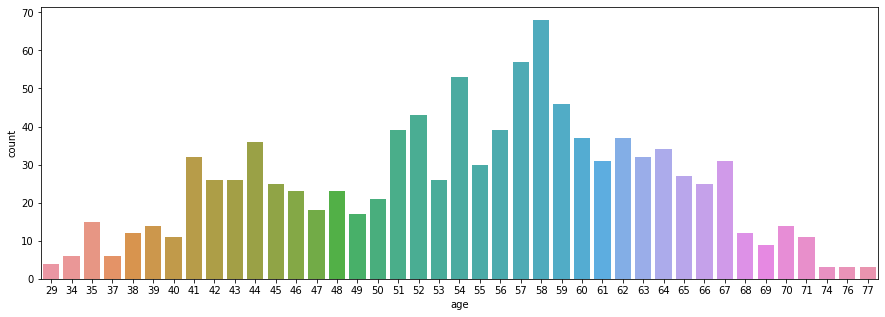

In [16]:
# check age distribution in dataset

plt.figure(figsize=(15,5))
sns.countplot(x='age',data=data)
plt.show()

C:\Users\Ayesha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


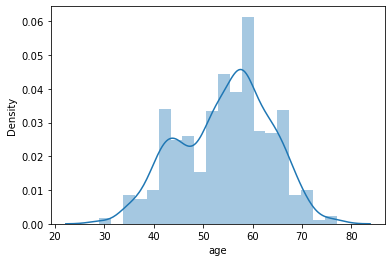

In [17]:
sns.distplot(data['age'],bins=20)
plt.show()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64


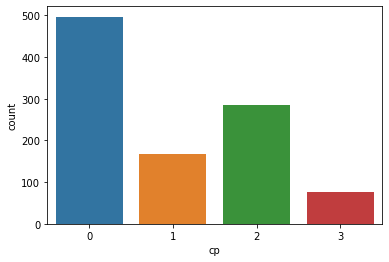

In [18]:
# this block of code describes the most common type of cp(chest pain) in the dataset

result = data['cp'].value_counts()
print(result)

sns.countplot(x='cp',data=data)
plt.show()

cp  target
0   0         375
    1         122
1   1         134
    0          33
2   1         219
    0          65
3   1          51
    0          26
Name: target, dtype: int64


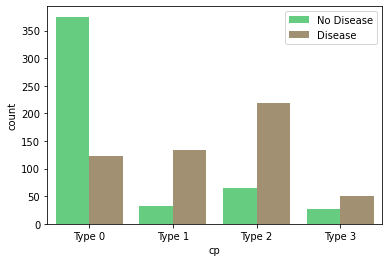

In [19]:
# this block of code describes the most common type of cp(chest pain) causes heart disease in the dataset

result = data.groupby('cp')['target'].value_counts()
print(result)


sns.countplot(x='cp', hue='target', data=data, palette='terrain')
plt.xticks([0,1,2,3],['Type 0','Type 1','Type 2', 'Type 3'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

sex  cp
0    0     133
     2     109
     1      57
     3      13
1    0     364
     2     175
     1     110
     3      64
Name: cp, dtype: int64


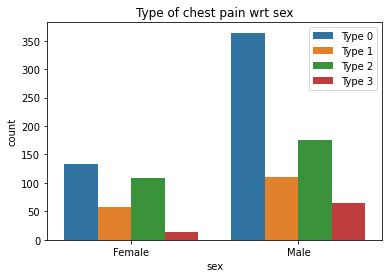

In [20]:
# this block of code describes cp(chest pain) wrt sex in the dataset

result = data.groupby('sex')['cp'].value_counts()
print(result)

plt.title("Type of chest pain wrt sex")
sns.countplot(x='sex',hue='cp', data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['Type 0', 'Type 1', 'Type 2', 'Type 3']);

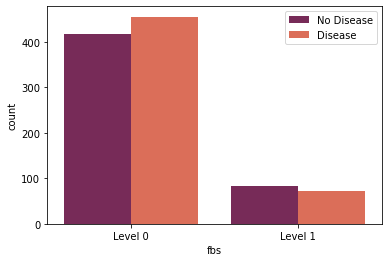

In [21]:
# this block of code describes the fbs(Fasting Blood Sugar) causes heart disease in the dataset

sns.countplot(x='fbs', hue='target', data=data, palette='rocket')
plt.xticks([0,1],['Level 0','Level 1'])
plt.legend(labels=['No Disease', 'Disease'])
plt.show()

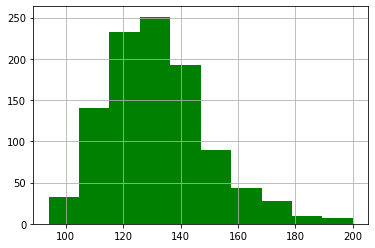

In [22]:
# this block of code describes the trestbps(resting blood pressure) distribution in the dataset

plt.hist(data['trestbps']) # OR
data['trestbps'].hist(color='Green')
plt.show()

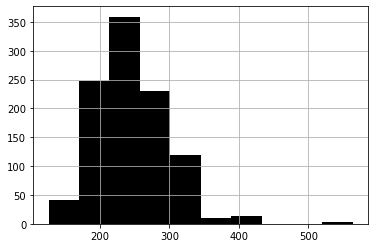

In [23]:
# this block of code describes the chol(Serum Cholestrol) distribution in the dataset

data['chol'].hist(color='black')
plt.show()

## training and testing data using machine learning models

In [24]:
x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)


In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
tree_f1_score=metrics.f1_score(y_test, y_pred)
tree_conf_matrix=confusion_matrix(y_test,y_pred)
print(f"The Accuracy is {acc*100}")
print(f"The f1 score is {tree_f1_score}")
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred))

The Accuracy is 98.53658536585365
The f1 score is 0.9850746268656716
confusion matrix
[[103   0]
 [  3  99]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.97      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

